## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_mouse_study_data = pd.merge(mouse_metadata, study_results, on=["Mouse ID"], how="left")

# Display the data table for preview
merged_mouse_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count = merged_mouse_study_data["Mouse ID"].nunique()
mice_count

249

In [3]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id_and_timepoint = merged_mouse_study_data[merged_mouse_study_data.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mouse_id_and_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicate_mouse_id_and_timepoint["Mouse ID"]

delete_mouse_id = merged_mouse_study_data.loc[merged_mouse_study_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
delete_mouse_id

array(['g989'], dtype=object)

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
remove_duplicates = merged_mouse_study_data[merged_mouse_study_data["Mouse ID"].isin(delete_mouse_id)==False]
remove_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count = remove_duplicates["Mouse ID"].nunique()
mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

In [8]:
# Summary Stats 1: Mean of the tumor volume
mean_tumor_volume = remove_duplicates.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
mean_tumor_volume

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [9]:
# Summary Stats 1: Median of the tumor volume
median_tumor_volume = remove_duplicates.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
median_tumor_volume

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [10]:
# Summary Stats 1: Variance of the tumor volume
variance_tumor_volume = remove_duplicates.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
variance_tumor_volume

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [11]:
# Summary Stats 1: Standard Deviation of the tumor volume
standard_deviation_tumor_volume = remove_duplicates.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
standard_deviation_tumor_volume

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [12]:
# Summary Stats 1: SEM of the tumor volume
SEM_tumor_volume = remove_duplicates.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
SEM_tumor_volume

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [13]:
summarystatsone = pd.DataFrame({"Mean Tumor Volume":mean_tumor_volume,"Median Tumor Volume":median_tumor_volume,
                                "Tumor Volume Variance":variance_tumor_volume, "Tumor Volume Std. Dev.":standard_deviation_tumor_volume, 
                                "Tumor Volume Std. Error":SEM_tumor_volume})
summarystatsone

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summarystatstwo = remove_duplicates.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(["mean","median","var","std","sem"])
summarystatstwo

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimens = remove_duplicates.groupby("Drug Regimen")

count_timepoints = drug_regimens["Timepoint"].count()
count_timepoints

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

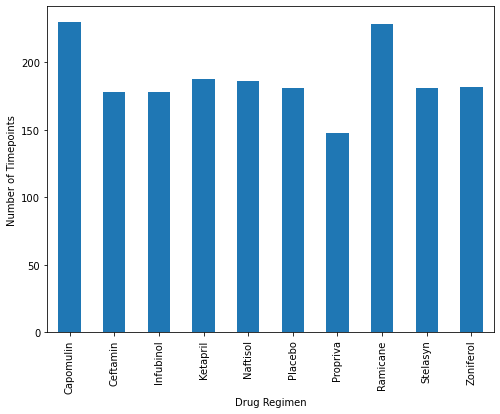

In [16]:
pandas_count_bar = count_timepoints.plot(kind="bar", figsize=(8,6))

pandas_count_bar.set_xlabel("Drug Regimen")
pandas_count_bar.set_ylabel("Number of Timepoints")

plt.show()

In [29]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_drug_regimens = remove_duplicates.groupby("Drug Regimen")
y_count_timepoints = x_drug_regimens["Timepoint"].count()
y_count_timepoints.index

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')

<BarContainer object of 10 artists>

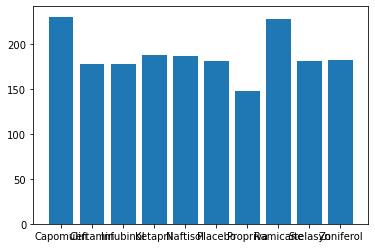

In [30]:
# Create a bar chart based upon the above data
plt.bar(y_count_timepoints.index, y_count_timepoints, align="center")

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = remove_duplicates["Sex"].count()
sex_count

In [ ]:
# Pandas: Generate a pie plot showing the distribution of female versus male mice using Pandas
female_count = remove_duplicates.loc[remove_duplicates["Sex"]=="Female"].count()
female_count

In [ ]:
# Pandas: Generate a pie plot showing the distribution of female versus male mice using Pandas
male_count = remove_duplicates.loc[remove_duplicates["Sex"]=="Male"].count()
male_count

In [ ]:
sex_dataframe = female_count, male_count
sex_dataframe

In [ ]:
# Pandas: Generate a pie plot showing the distribution of female versus male mice using Pandas
pandas_pie = pd.DataFrame([922,958], index=["male","female"])
pandas_pie.plot(kind="pie", subplots=True, figsize=(6,6))
plt.show()

In [ ]:
# Pyplot: Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [922, 958]
explode = (0.5, 0)
plt.pie(sizes, explode=explode, labels=labels)
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
groupby_mouse_remove_duplicates = remove_duplicates.groupby("Mouse ID").max()["Timepoint"]
groupby_mouse_remove_duplicates

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [31]:
# Create a dataframe that only includes data for the Capomulin regimen
capomulin_df = remove_duplicates.loc[remove_duplicates["Drug Regimen"]=="Capomulin"]
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [32]:
# Isolate capomulin_df for mouse ID s185
mouse_s185_capomulin_df = capomulin_df.loc[capomulin_df["Mouse ID"]=="s185"]
mouse_s185_capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


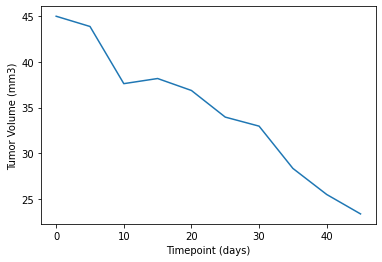

In [33]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Set x-axis
x_axis = mouse_s185_capomulin_df["Timepoint"]

# Points (y-axis)
points = mouse_s185_capomulin_df["Tumor Volume (mm3)"]

# Create labels for the x and y axis
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

# Plot the line
plt.plot(x_axis, points)
plt.show()

In [39]:
# Generate a scatter plot of average tumor volume vs. average mouse weight for the Capomulin regimen
average_tumor_volume_by_mouse = capomulin_df.groupby("Mouse ID").mean()
average_tumor_volume_by_mouse["Weight (g)"]
average_tumor_volume_by_mouse["Tumor Volume (mm3)"]

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

<Figure size 576x360 with 0 Axes>

In [35]:
# Gather y axis data
average_mouse_weight = capomulin_df["Weight (g)"].mean()
average_mouse_weight

19.965217391304346

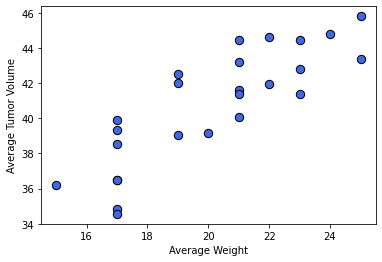

<Figure size 576x360 with 0 Axes>

In [41]:
# Create labels for the x and y axis

plt.ylabel("Average Tumor Volume", fontsize=10, color='black')
plt.xlabel("Average Weight", fontsize=10, color='black')

# Create plot:
plt.scatter(average_tumor_volume_by_mouse["Weight (g)"], average_tumor_volume_by_mouse["Tumor Volume (mm3)"], marker='o', color='royalblue', s=[70], edgecolors='black')
plt.figure(figsize=(8,5))

# Show plot:
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.8419363424694721


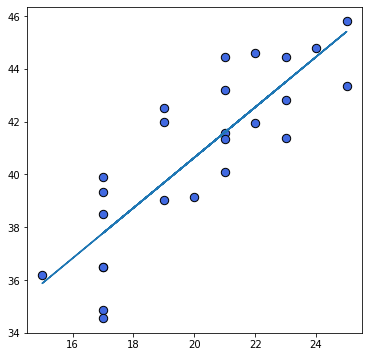

<Figure size 576x360 with 0 Axes>

In [48]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

plt.figure(figsize=(6,6))

# Perform a linear regression on weight vs. average tumor volume:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(average_tumor_volume_by_mouse["Weight (g)"], average_tumor_volume_by_mouse["Tumor Volume (mm3)"])

# Get regression values:
regress_values = average_tumor_volume_by_mouse["Weight (g)"] * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(average_tumor_volume_by_mouse["Weight (g)"], average_tumor_volume_by_mouse["Tumor Volume (mm3)"], marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(average_tumor_volume_by_mouse["Weight (g)"], regress_values)
plt.figure(figsize=(8,5))

# Print r-squared value:
print(f'The correlation between mouse weight and the average tumor volume is {rvalue}')

# Show plot:
plt.show()

In [47]:
regress_values

Mouse ID
b128    42.549834
b742    41.595394
f966    37.777635
g288    39.686515
g316    42.549834
i557    44.458713
i738    40.640954
j119    43.504273
j246    41.595394
l509    41.595394
l897    39.686515
m601    37.777635
m957    39.686515
r157    45.413153
r554    37.777635
r944    45.413153
s185    37.777635
s710    43.504273
t565    37.777635
u364    37.777635
v923    41.595394
w150    43.504273
w914    41.595394
x401    35.868756
y793    37.777635
Name: Weight (g), dtype: float64